In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_file = "../Dataset/train_stratified.csv"
train_df = pd.read_csv(train_file, header = 0)

In [3]:
#check for missing values
def missing_val(data):
  nullVal = data.isnull().sum().sum()
  return nullVal
missing_val(train_df)

0

In [4]:
class_name = ['class']
for index in range(1,785):
    class_name.append(index)

train_file = "../Dataset/train.csv"
train_df = pd.read_csv(train_file, header = None, names=class_name)

In [5]:
class_map = {}
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for i in range(len(alphabets)):
    class_map[i] = alphabets[i]
class_map

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [6]:
train_df['class'].map(class_map).unique()

array(['A', 'C', 'O', 'Y', 'Q', 'W', 'U', 'J', 'K', 'L', 'S', 'X', 'F',
       'P', 'N', 'Z', 'T', 'E', 'R', 'G', 'H', 'V', 'M', 'B', 'D', 'I'],
      dtype=object)

In [7]:
name = train_df['class'].value_counts().keys().map(class_map)

val = train_df['class'].value_counts()

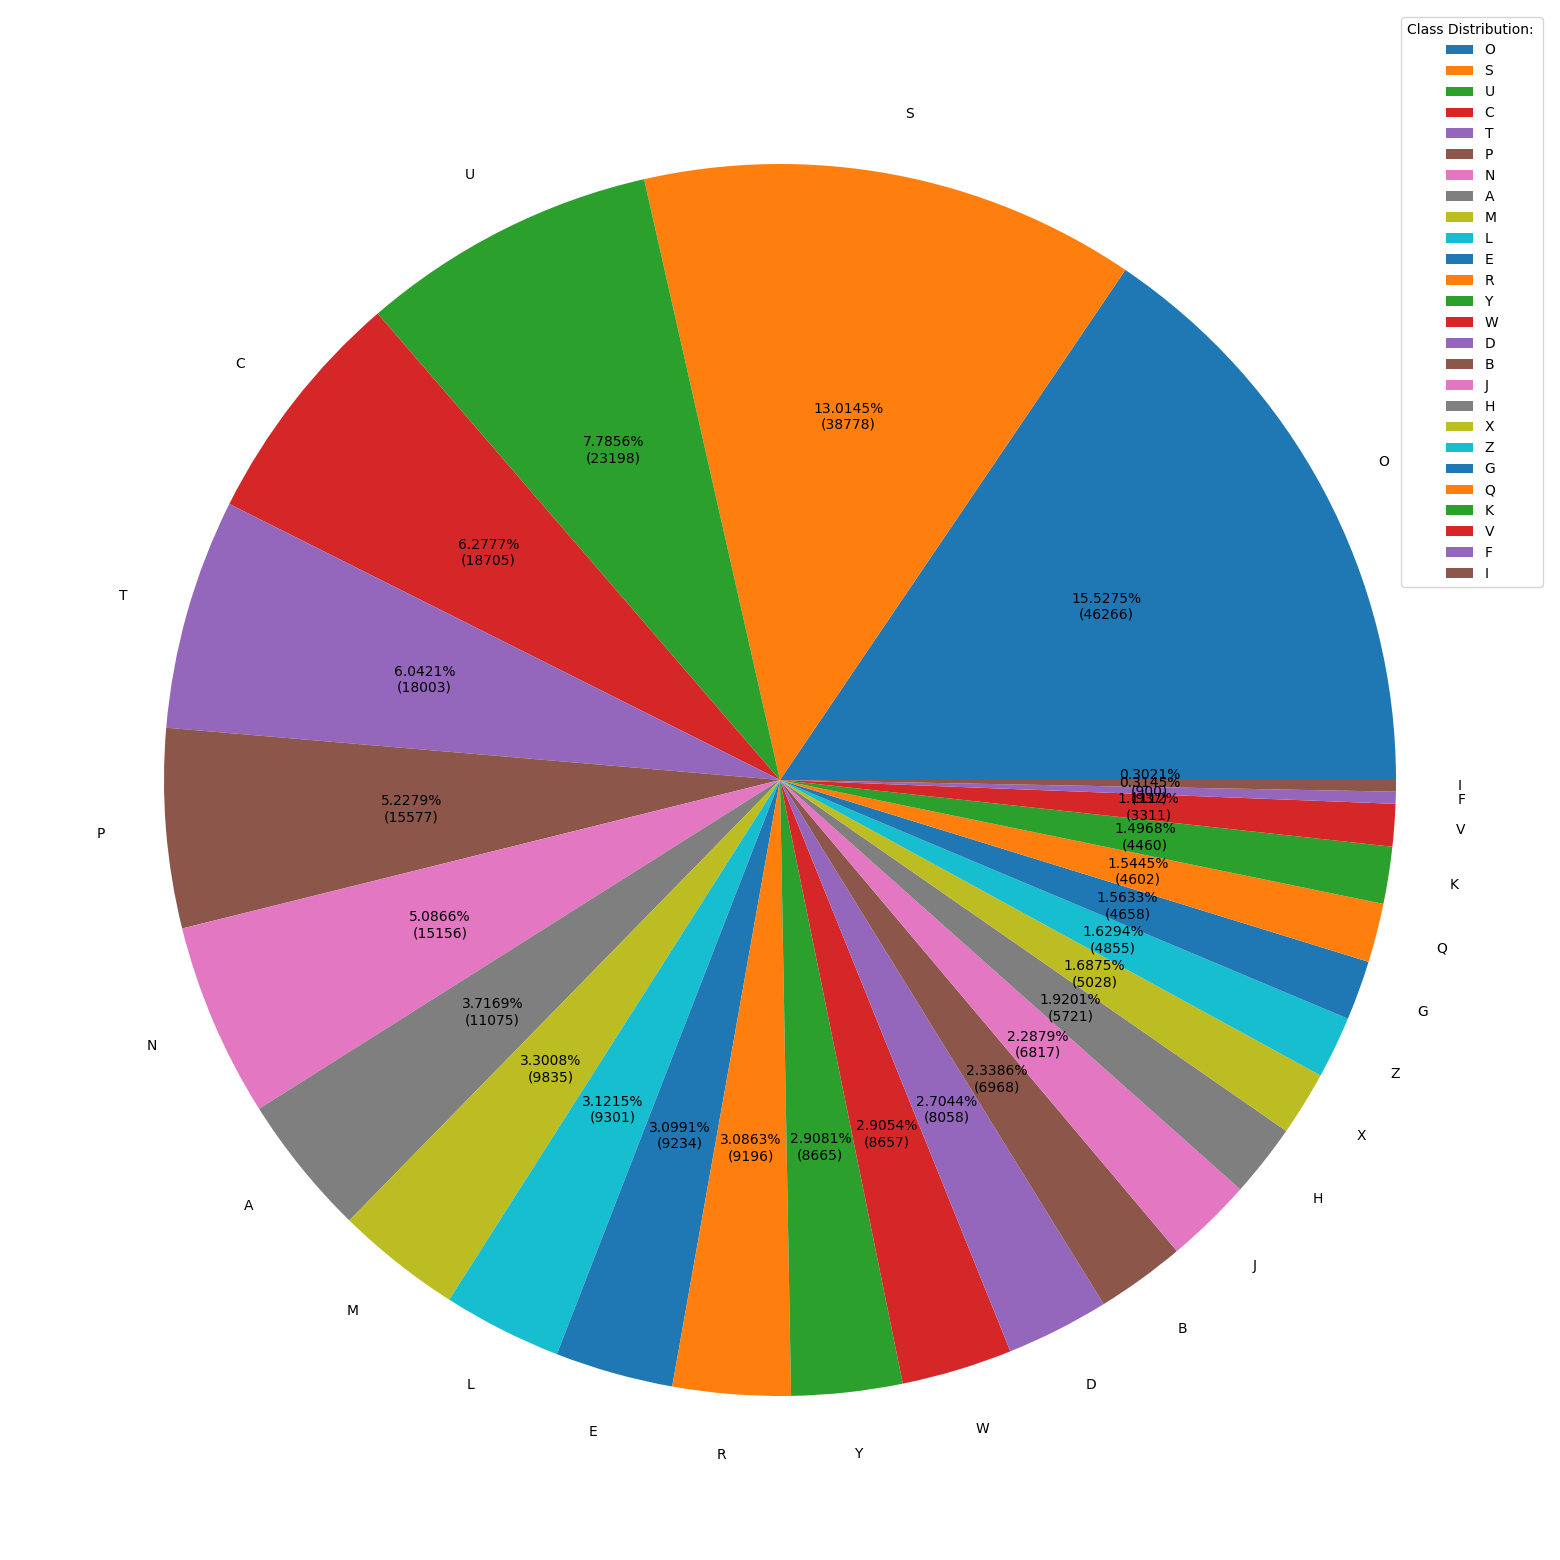

In [8]:
total = len(train_df.values)
def autopct_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

plt.figure(figsize=(20,20))
plt.pie(val, labels=name, autopct=autopct_fmt)
plt.legend(title = "Class Distribution: ")
plt.show()

In [9]:
#set train data
train_data = train_df.iloc[:,1:].values
#set train labels
train_label = train_df.iloc[:,0].values

In [10]:
train_df.iloc[:,0].value_counts().sort_index()

0     11075
1      6968
2     18705
3      8058
4      9234
5       937
6      4658
7      5721
8       900
9      6817
10     4460
11     9301
12     9835
13    15156
14    46266
15    15577
16     4602
17     9196
18    38778
19    18003
20    23198
21     3311
22     8657
23     5028
24     8665
25     4855
Name: class, dtype: int64

In [11]:
test_file = "../Dataset/test_stratified.csv"
test_df = pd.read_csv(test_file, header = 0)

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74490 entries, 0 to 74489
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 446.1 MB


In [13]:
#set test data
test_data = test_df.iloc[:,1:].values
#set test labels
test_label = test_df.iloc[:,0].values

Feed Data to KNN Model:

In [14]:
#import for KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check accuracy
from sklearn import metrics

#Use different k neighbors values to see test accuracy for each
k_val = range(3,8)
k_val
scores = []
error = []

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_label)
    pred = knn.predict(test_data)
    scores.append(metrics.accuracy_score(test_label,pred))
    error.append(np.mean(pred != test_label))
print("k value: ", k, "accuracy score: ", scores, "error rate : ", error)

k value:  7 accuracy score:  [0.9814874479795945, 0.9715129547590281, 0.9696335078534032, 0.9663042019062962, 0.9638877701704927] error rate :  [0.018512552020405422, 0.028487045240971943, 0.030366492146596858, 0.033695798093703856, 0.03611222982950732]


Text(0, 0.5, 'Test Accuracy Score')

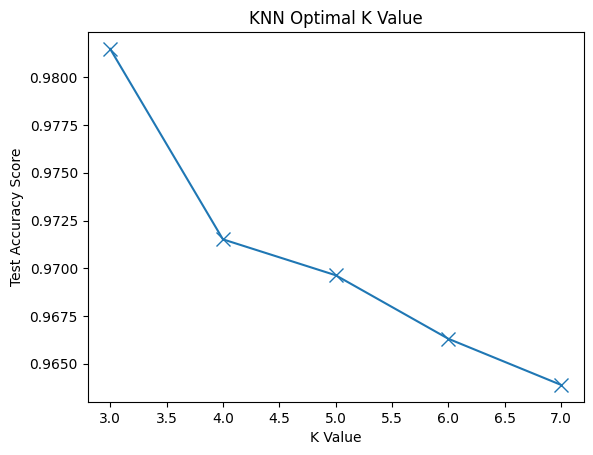

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#plot value of K vs. Test Accuracy
k_vals = range(3,8)

plt.plot(k_val, scores, marker='x', markersize=10)
plt.title('KNN Optimal K Value')
plt.xlabel('K Value')
plt.ylabel('Test Accuracy Score')

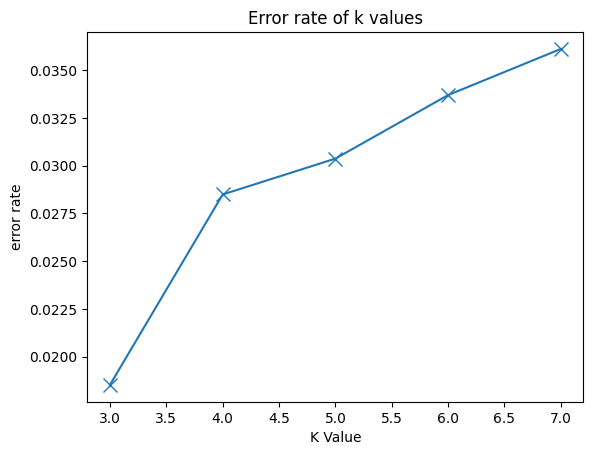

In [16]:
#error rate plot
plt.plot(k_val, error, marker="x", markersize=10)
plt.title("Error rate of k values")
plt.xlabel("K Value")
plt.ylabel("error rate")
plt.show()

From the above results, k-val 5 seems like the best-fit k-value to use on this stratified dataset if we focus on the elbow method. Using the elbow method, the error rate is linear after n_neighbor is set to 5. 

Using K-Value 5 for Stratified Dataset:

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_data,train_label )

prediction = model.predict(test_data)
print(model.score(test_data, test_label)*100)

96.96335078534032


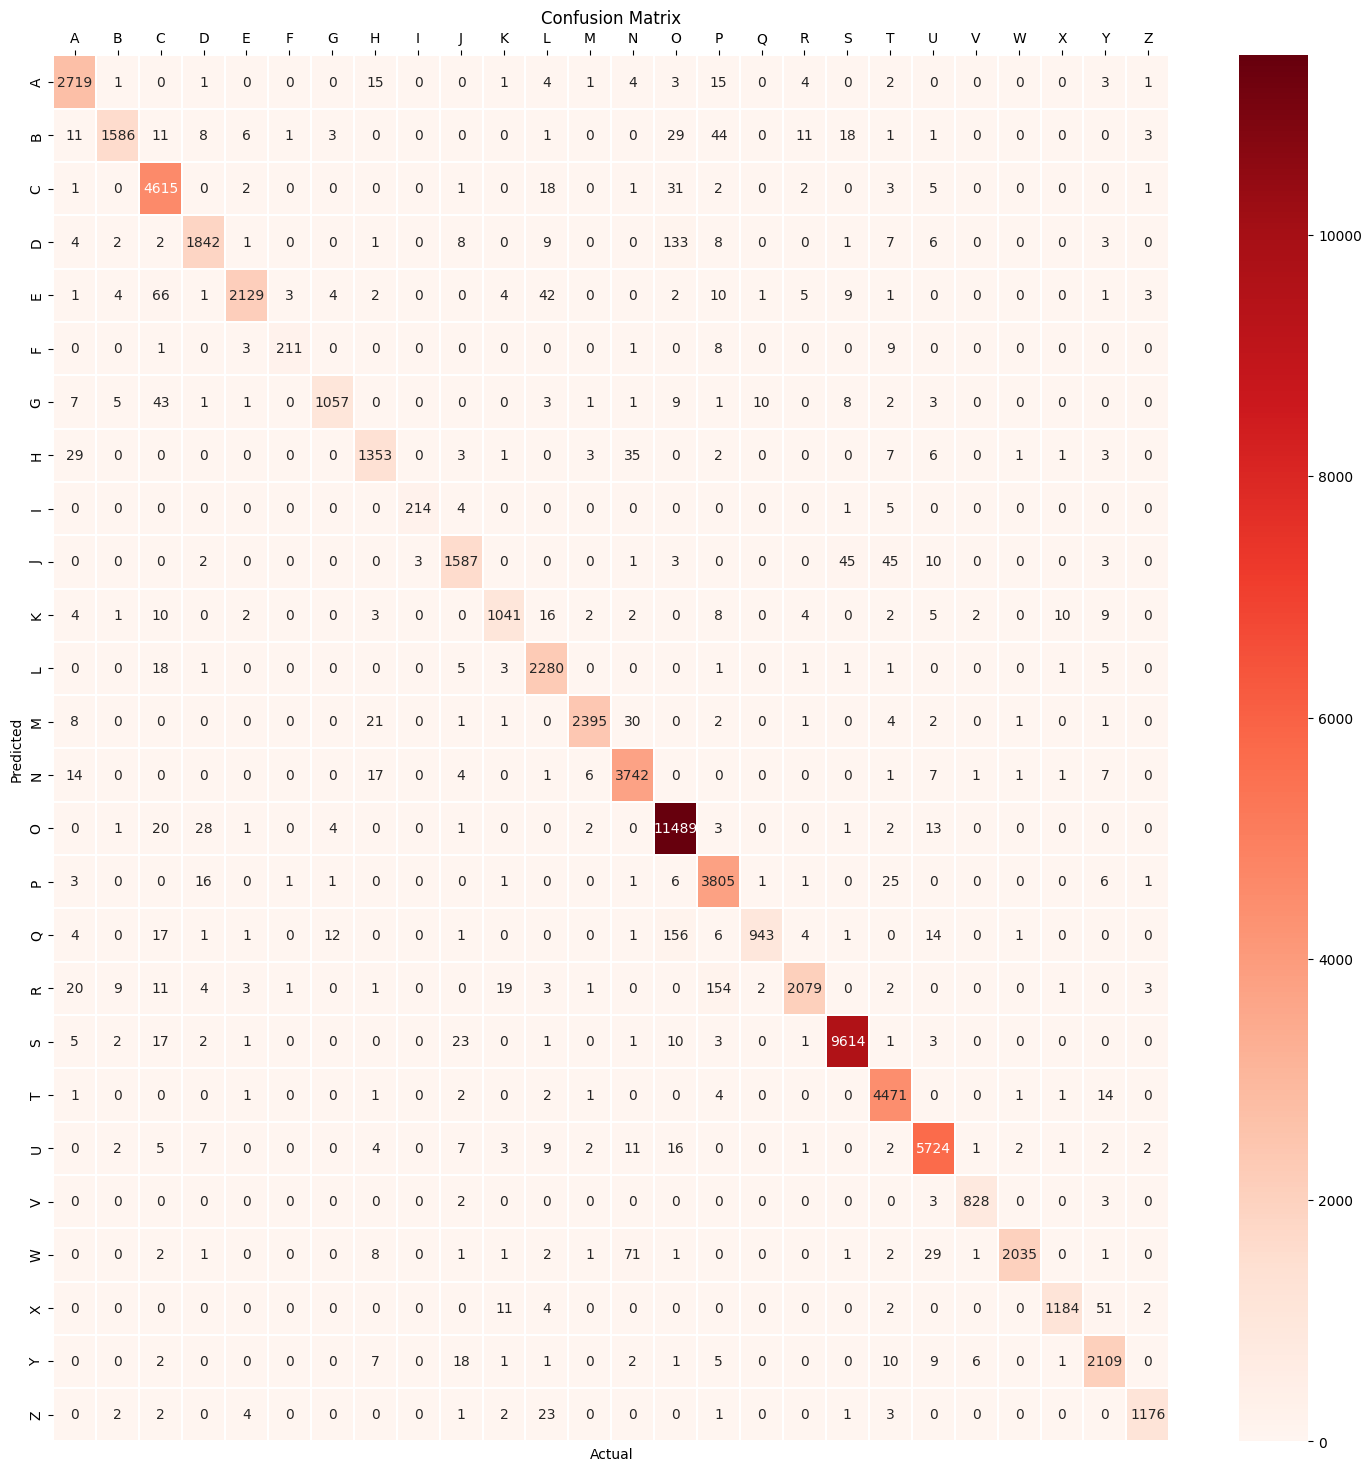

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import rcParams

cm= confusion_matrix(y_true=test_label, y_pred=prediction)
s = sns.heatmap(cm, xticklabels=alphabets,yticklabels=alphabets, annot=True,fmt='g', cmap='Reds', linewidth=0.10)
s.set(title='Confusion Matrix')
s.xaxis.tick_top()
s.set_xlabel('Actual')
s.set_ylabel('Predicted')

rcParams['figure.figsize']=18,18

In [20]:
from sklearn.metrics import classification_report

print(classification_report(test_label, prediction,target_names=alphabets))

              precision    recall  f1-score   support

           A       0.96      0.98      0.97      2774
           B       0.98      0.91      0.95      1734
           C       0.95      0.99      0.97      4682
           D       0.96      0.91      0.93      2027
           E       0.99      0.93      0.96      2288
           F       0.97      0.91      0.94       233
           G       0.98      0.92      0.95      1152
           H       0.94      0.94      0.94      1444
           I       0.99      0.96      0.97       224
           J       0.95      0.93      0.94      1699
           K       0.96      0.93      0.94      1121
           L       0.94      0.98      0.96      2317
           M       0.99      0.97      0.98      2467
           N       0.96      0.98      0.97      3802
           O       0.97      0.99      0.98     11565
           P       0.93      0.98      0.96      3868
           Q       0.99      0.81      0.89      1162
           R       0.98    